$$ Importing Libraries $$

In [57]:
import pandas as pd
from pandas import DataFrame
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

$$ Importing Required Data $$

In [23]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(20)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [24]:
regression=LinearRegression()
regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
x=DataFrame(s_data, columns=['Hours'])
y=DataFrame(s_data, columns=['Scores'])

<Figure size 720x432 with 0 Axes>

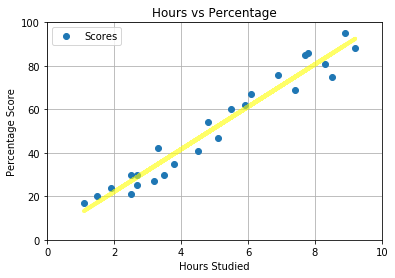

In [29]:
# Plotting the distribution of scores
plt.figure(figsize=(10,6))
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.plot(x,regression.predict(x),color='yellow',linewidth='4',alpha=0.6)
plt.grid()
plt.show()

### Preparing the data ###

In [30]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training data ###

In [34]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

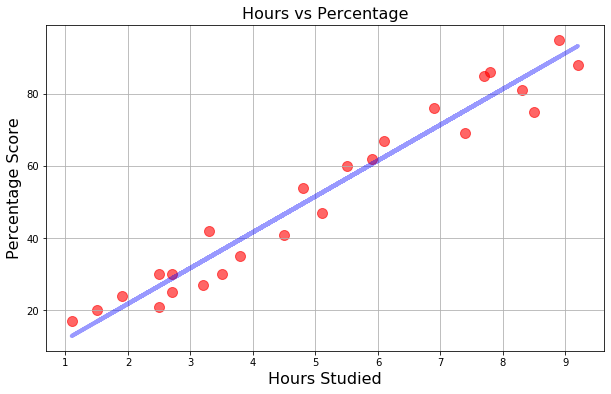

In [45]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.figure(figsize=(10,6))
plt.scatter(X, y,s=100,alpha=0.6,color='red')
plt.title('Hours vs Percentage',fontsize=16)  
plt.xlabel('Hours Studied',fontsize=16)  
plt.ylabel('Percentage Score',fontsize=16)
plt.plot(X, line,color='blue',linewidth=4,alpha=0.4);
plt.grid()
plt.show()

$$Predictions$$

In [46]:
print(X_test) # Testing data - In Hours
y_pred = regression.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
#testing data set
hours = [[9.25]]
own_pred = regression.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


### Evaluating the model ###

In [58]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
